In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [84]:
try:
    gspc_df = pd.read_csv('gspc_daily_price.csv', parse_dates=['Date'], encoding='latin1') #or encoding='ISO-8859-1'
    print("Data loaded successfully with latin1 encoding.")
except UnicodeDecodeError:
    try:
        gspc_df = pd.read_csv('gspc_daily_price.csv', parse_dates=['Date'], encoding='cp1252')
        print("Data loaded successfully with cp1252 encoding.")
    except UnicodeDecodeError as e:
        print(f"Error loading data: {e}")

vix_df = pd.read_csv('vix_daily_price.csv', parse_dates=['Date'])
sentiment_df = pd.read_csv('news_sentiment_data.csv', parse_dates=['date'])

Data loaded successfully with latin1 encoding.


C:\Users\mehdi\AppData\Local\Temp\ipykernel_33296\1749497331.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gspc_df = pd.read_csv('gspc_daily_price.csv', parse_dates=['Date'], encoding='latin1') #or encoding='ISO-8859-1'
C:\Users\mehdi\AppData\Local\Temp\ipykernel_33296\1749497331.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vix_df = pd.read_csv('vix_daily_price.csv', parse_dates=['Date'])


In [85]:
# Display First Few Rows
print("S&P 500 Data:")
print(gspc_df.head())
print("\nVIX Data:")
print(vix_df.head())
print("\nSentiment Data:")
print(sentiment_df.head())

S&P 500 Data:
        Date     Open     High      Low   Close       Volume
0 2025-03-17  5635.60  5703.52  5631.12  5675.12  5031770000
1 2025-03-14  5563.85  5645.27  5563.85  5638.94  4863180000
2 2025-03-13  5594.45  5597.78  5504.65  5521.52  5018980000
3 2025-03-12  5624.84  5642.19  5546.09  5599.30  5219830000
4 2025-03-11  5603.65  5636.30  5528.41  5572.07  6221240000

VIX Data:
        Date   Open   High    Low  Close 
0 2025-03-17  22.89  22.95  20.32   20.51
1 2025-03-14  24.35  24.36  21.48   21.77
2 2025-03-13  24.92  26.13  23.46   24.66
3 2025-03-12  26.88  26.91  23.89   24.23
4 2025-03-11  27.94  29.57  26.18   26.92

Sentiment Data:
        date  News Sentiment
0 2025-03-16           -0.12
1 2025-03-15           -0.10
2 2025-03-14           -0.09
3 2025-03-13           -0.08
4 2025-03-12           -0.07


In [86]:
# Data Preprocessing
print("\nPreprocessing Data...")
gspc_df.rename(columns={'Close ': 'Close', 'Open ': 'Open', 'High ': 'High', 'Low ': 'Low', 'Volume ': 'Volume'}, inplace=True)
vix_df.rename(columns={'Close ': 'Close', 'Open ': 'Open', 'High ': 'High', 'Low ': 'Low'}, inplace=True)
sentiment_df.rename(columns={'date': 'Date'}, inplace=True)


Preprocessing Data...


In [87]:
# Ensure Data Consistency
gspc_df.sort_values(by='Date', inplace=True)
vix_df.sort_values(by='Date', inplace=True)
sentiment_df.sort_values(by='Date', inplace=True)

In [88]:
# Merge Data
print("Merging Data...")
df = pd.merge(gspc_df, vix_df, on='Date', suffixes=('_sp500', '_vix'))
df = pd.merge(df, sentiment_df, on='Date', how='left')
df.fillna(0, inplace=True)

Merging Data...


In [89]:
print(df.columns) # Check the column names.

Index(['Date', 'Open_sp500', 'High_sp500', 'Low_sp500', 'Close _sp500',
       'Volume', 'Open_vix', 'High_vix', 'Low_vix', 'Close _vix',
       'News Sentiment'],
      dtype='object')


In [90]:
df.columns = df.columns.str.replace('\xa0', '') # Remove the non-breaking spaces.

In [91]:
print(df.columns) # Verify the column names are now correct.

Index(['Date', 'Open_sp500', 'High_sp500', 'Low_sp500', 'Close_sp500',
       'Volume', 'Open_vix', 'High_vix', 'Low_vix', 'Close_vix',
       'News Sentiment'],
      dtype='object')


In [92]:
df.dtypes

Date              datetime64[ns]
Open_sp500               float64
High_sp500               float64
Low_sp500                float64
Close_sp500              float64
Volume                     int64
Open_vix                 float64
High_vix                 float64
Low_vix                  float64
Close_vix                float64
News Sentiment           float64
dtype: object

In [93]:
df

,Date,Open_sp500,High_sp500,Low_sp500,Close_sp500,Volume,Open_vix,High_vix,Low_vix,Close_vix,News Sentiment
0,2024-03-18,5154.77,5175.60,5145.47,5149.42,4036220000,14.75,14.85,14.26,14.33,0.17
1,2024-03-19,5139.09,5180.31,5131.59,5178.51,4031760000,14.50,14.86,13.80,13.82,0.17
2,2024-03-20,5181.69,5226.19,5171.55,5224.62,4064850000,13.83,14.17,13.01,13.04,0.17
3,2024-03-21,5253.43,5261.10,5240.66,5241.53,4207730000,12.98,13.08,12.40,12.92,0.17
4,2024-03-22,5242.48,5246.09,5229.87,5234.18,3374700000,12.92,13.15,12.58,13.06,0.16
...,...,...,...,...,...,...,...,...,...,...,...
245,2025-03-11,5603.65,5636.30,5528.41,5572.07,6221240000,27.94,29.57,26.18,26.92,-0.05
246,2025-03-12,5624.84,5642.19,5546.09,5599.30,5219830000,26.88,26.91,23.89,24.23,-0.07
247,2025-03-13,5594.45,5597.78,5504.65,5521.52,5018980000,24.92,26.13,23.46,24.66,-0.08
248,2025-03-14,5563.85,5645.27,5563.85,5638.94,4863180000,24.35,24.36,21.48,21.77,-0.09


In [94]:
# Calculate RSI (14-Day)
def calculate_rsi(data, window=14):
    delta = data['Close_sp500'].diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = calculate_rsi(df)

In [95]:
# Select Last 30 Days
df_last_30 = df.tail(30)

Visualizing Data...


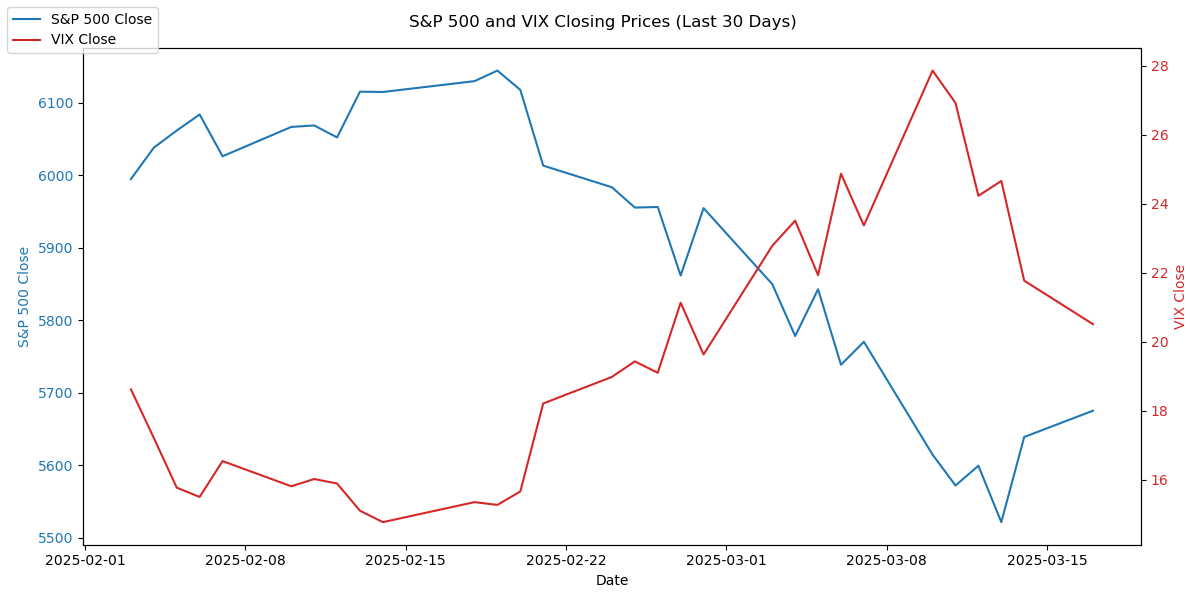

In [96]:
# Visualization with Secondary Y-Axis
print("Visualizing Data...")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot S&P 500 on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Close', color=color)
ax1.plot(df_last_30['Date'], df_last_30['Close_sp500'], color=color, label='S&P 500 Close')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for VIX
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('VIX Close', color=color)  # we already handled the x-label with ax1
ax2.plot(df_last_30['Date'], df_last_30['Close_vix'], color=color, label='VIX Close')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('S&P 500 and VIX Closing Prices (Last 30 Days)') #set the figure title.
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Add legend to the figure.
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
fig.legend(lines, labels, loc='upper left')

plt.show()

Visualizing S&P 500 vs. News Sentiment...


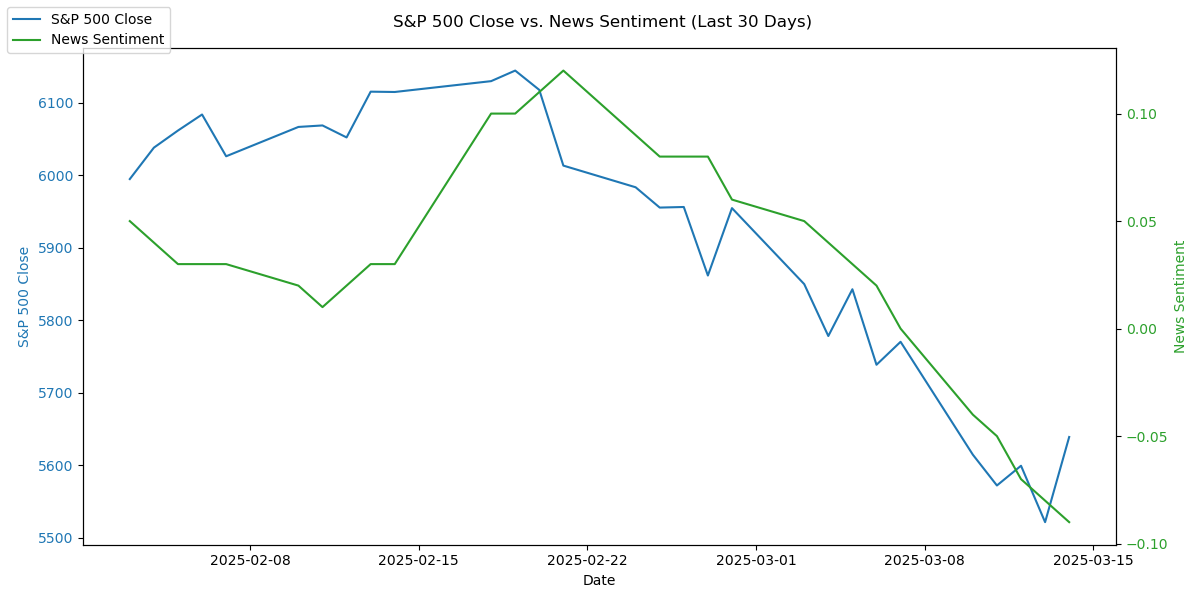

In [103]:
# 1. Visualization: S&P 500 Close vs. News Sentiment
print("Visualizing S&P 500 vs. News Sentiment...")
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Close', color=color)
ax1.plot(df_last_30['Date'], df_last_30['Close_sp500'], color=color, label='S&P 500 Close')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('News Sentiment', color=color)
ax2.plot(df_last_30['Date'], df_last_30['News Sentiment'], color=color, label='News Sentiment')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('S&P 500 Close vs. News Sentiment (Last 30 Days)')
fig.tight_layout()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
fig.legend(lines, labels, loc='upper left')

plt.show()

Visualizing S&P 500 vs. RSI...


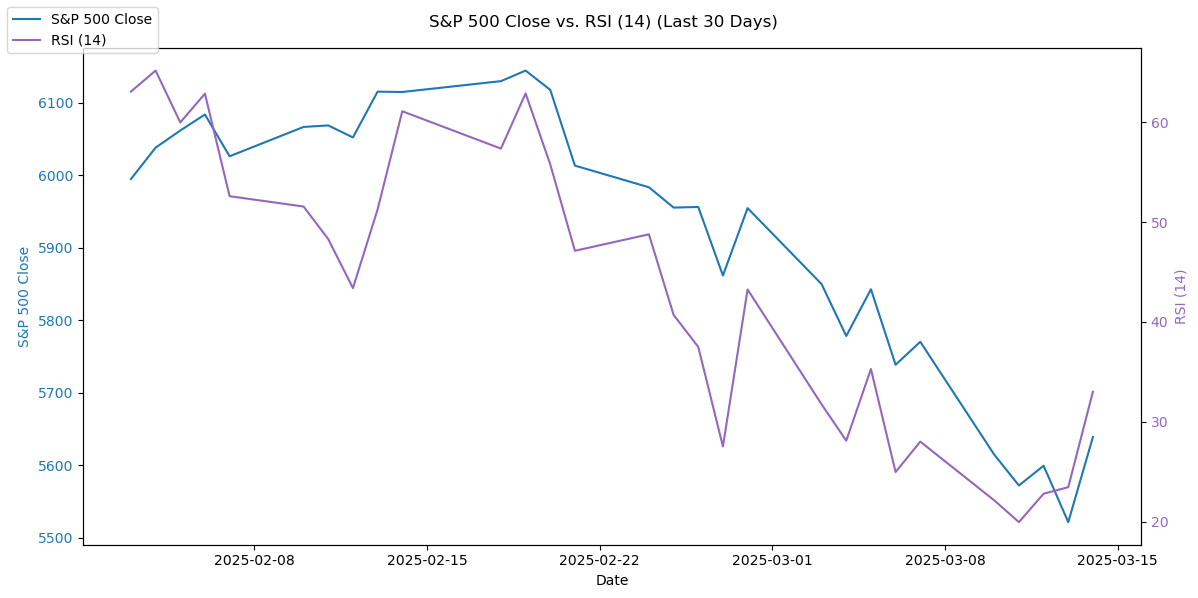

In [104]:
# 2. Visualization: S&P 500 Close vs. RSI
print("Visualizing S&P 500 vs. RSI...")
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Close', color=color)
ax1.plot(df_last_30['Date'], df_last_30['Close_sp500'], color=color, label='S&P 500 Close')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('RSI (14)', color=color)
ax2.plot(df_last_30['Date'], df_last_30['RSI_14'], color=color, label='RSI (14)')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('S&P 500 Close vs. RSI (14) (Last 30 Days)')
fig.tight_layout()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
fig.legend(lines, labels, loc='upper left')

plt.show()

In [97]:
# Prepare Features and Target
df_last_30['Next_Day_Close'] = df_last_30['Close_sp500'].shift(-1)

features = ['Open_sp500', 'High_sp500', 'Low_sp500', 'Close_sp500', 'Volume', 'RSI_14', 'Close_vix', 'News Sentiment']
df_last_30 = df_last_30.dropna()

X = df_last_30[features]
y = df_last_30['Next_Day_Close']

C:\Users\mehdi\AppData\Local\Temp\ipykernel_33296\1696653933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_30['Next_Day_Close'] = df_last_30['Close_sp500'].shift(-1)


In [98]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Model Training
print("Training Linear Regression Model...")
model = LinearRegression()
model.fit(X_train, y_train)

Training Linear Regression Model...


LinearRegression()

In [100]:
# Predictions and Evaluation
y_pred = model.predict(X_test)

In [101]:
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Model Evaluation:
Mean Squared Error: 4402.684536722445
Mean Absolute Error: 55.058732307350816
R^2 Score: 0.8647518426948341


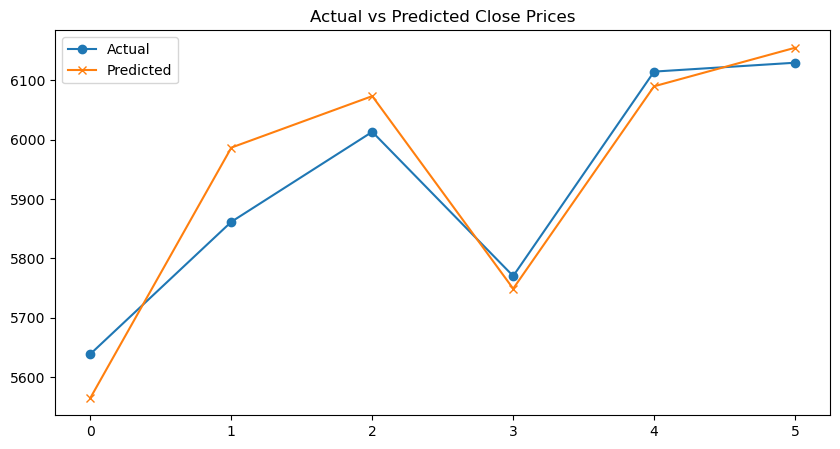

In [102]:
# Visualizing Predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.legend()
plt.title('Actual vs Predicted Close Prices')
plt.show()

In [110]:
# Predict Tomorrow's Price
print("\nPredicting Tomorrow's Price...")

# Get the latest data
latest_data = df.tail(1)  # Get the very last row

# Prepare the input for prediction
tomorrow_input = latest_data[features]

# Make the prediction
tomorrow_prediction = model.predict(tomorrow_input)[0]


Predicting Tomorrow's Price...


In [111]:
# Get today's closing price
today_close = df['Close_sp500'].iloc[-1]

# Calculate the change and percentage change
price_change = tomorrow_prediction - today_close
percentage_change = (price_change / today_close) * 100

# Print the predicted price and change
print(f"Predicted S&P 500 Close for Tomorrow: {tomorrow_prediction:.2f}")
print(f"Predicted Change: {price_change:.2f} points ({percentage_change:.2f}%)")

Predicted S&P 500 Close for Tomorrow: 5746.29
Predicted Change: 71.17 points (1.25%)
